In [3]:
# coding=utf-8

%matplotlib inline

import os
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

In [24]:
# 这里我们尝试导入最近5年DJI道琼斯工业股指的最近5年数据。

dji = web.DataReader('^DJI', 'stooq') ##默认导入的是最近5年的数据


df = dji
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-18,35901.69,35952.63,35654.39,35870.95,479447373
2021-11-17,36159.70,36159.70,35909.48,35931.05,408410897
2021-11-16,36076.18,36316.61,36076.18,36142.22,361539407
2021-11-15,36128.83,36236.07,36031.78,36087.45,326667902
2021-11-12,35963.78,36147.63,35934.59,36100.31,332877997
...,...,...,...,...,...
2016-11-28,19122.14,19138.72,19072.25,19097.90,88460807
2016-11-25,19093.72,19152.14,19093.72,19152.14,45887907
2016-11-23,19015.52,19083.76,19000.38,19083.18,77873978


In [22]:
print(type(df))
df.dtypes
# plt.plot(dji)


<class 'pandas.core.frame.DataFrame'>


Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [30]:
pd.set_option('precision', 2)  # 显示小数点后的位数
# 重新采样5日 周期
dji.resample("5d").mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-21,18994.58,19060.14,18985.01,19053.97,7.24e+07
2016-11-26,19107.28,19169.47,19085.95,19114.36,1.12e+08
2016-12-01,19184.93,19228.43,19155.57,19192.86,1.70e+08
2016-12-06,19413.30,19559.26,19391.40,19543.26,3.32e+08
2016-12-11,19827.51,19924.01,19788.59,19838.10,3.72e+08


In [31]:
df.resample("W").mean().head()


,Open,High,Low,Close,Volume
Date,,,,,
2016-11-27,18994.58,19060.14,18985.01,19053.97,7.24e+07
2016-12-04,19126.46,19183.77,19107.56,19141.09,1.06e+08
2016-12-11,19379.51,19502.37,19350.46,19477.86,3.29e+08
2016-12-18,19843.81,19923.85,19795.07,19839.16,4.12e+08
2016-12-25,19911.50,19951.99,19895.32,19930.47,2.52e+08


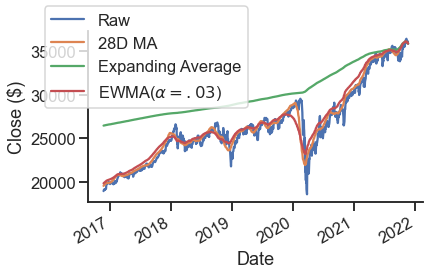

In [51]:
df.Close.plot(label='Raw')
df.Close.rolling(28).mean().plot(label='28D MA')
df.Close.expanding().mean().plot(label='Expanding Average')
df.Close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(.5, .5))
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()